In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

Number of clusters

In [19]:


# Ensure you load the dataset correctly
df = pd.read_csv('star_classification.csv')

print(df.columns)  # List all column names

K = len(df['class'].unique())  # Number of clusters based on unique classes


Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')
3


Extract data and standardize features

In [12]:
numerical_features = ["u", "g", "r", "i", "z"]
X = df[numerical_features].values
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

Randomly initialize centroids

In [13]:
np.random.seed(42)  # For reproducibility
M = np.array([np.mean(X_standardized, axis=0)] * K) + np.random.randn(K, X_standardized.shape[1])


K-Means Algorithm

In [14]:
def kmeans(X, M, max_iters=100, tol=1e-4):
    N, D = X.shape
    K = M.shape[0]
    costs = []

    for it in range(max_iters):
        # Assign points to nearest cluster
        r = np.zeros((N, K))  # Cluster assignments (one-hot encoding)
        for i in range(N):
            distances = np.linalg.norm(X[i] - M, axis=1)
            nearest_cluster = np.argmin(distances)
            r[i, nearest_cluster] = 1

        # Update centroids
        new_M = np.zeros_like(M)
        for k in range(K):
            cluster_points = X[r[:, k] == 1]
            if len(cluster_points) > 0:  # Avoid division by zero
                new_M[k] = np.mean(cluster_points, axis=0)
            else:
                new_M[k] = M[k]  # Keep the centroid the same if no points are assigned

        #  Check for convergence
        centroid_shift = np.linalg.norm(new_M - M)
        costs.append(centroid_shift)
        if centroid_shift < tol:
            print(f"Converged at iteration {it+1}")
            break

        M = new_M

    return M, r, costs

Run K-Means

In [15]:
final_centroids, cluster_assignments, cost_history = kmeans(X_standardized, M)


Converged at iteration 34


Plot the cost function (convergence)

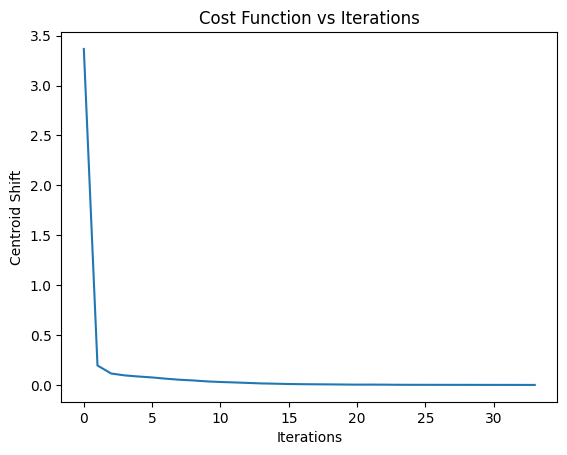

In [16]:
plt.plot(cost_history)
plt.title("Cost Function vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Centroid Shift")
plt.show()